In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/thesis/train.csv"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv(path)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


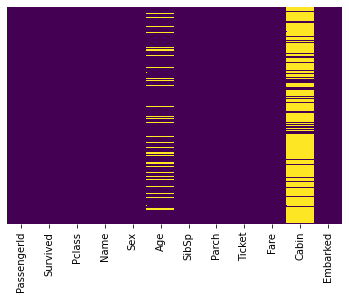

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

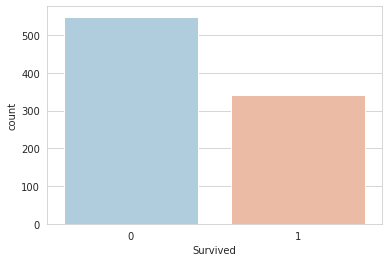

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df,palette='RdBu_r')

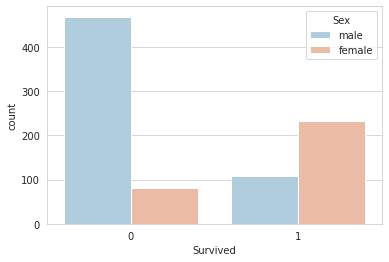

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')

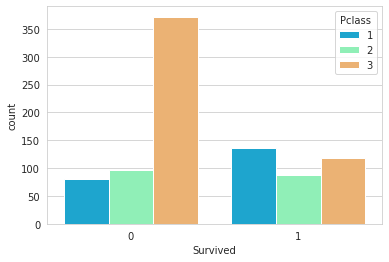

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


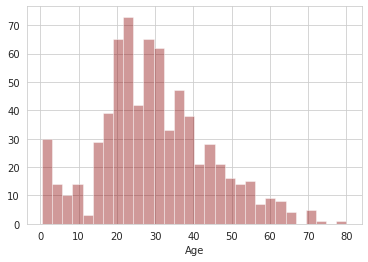

In [ ]:
sns.distplot(df['Age'].dropna(),kde=False,color='darkred',bins=30)

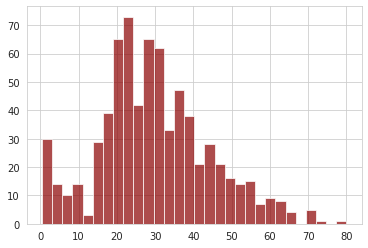

In [ ]:
df['Age'].hist(bins=30,color='darkred',alpha=0.7)

data cleaning


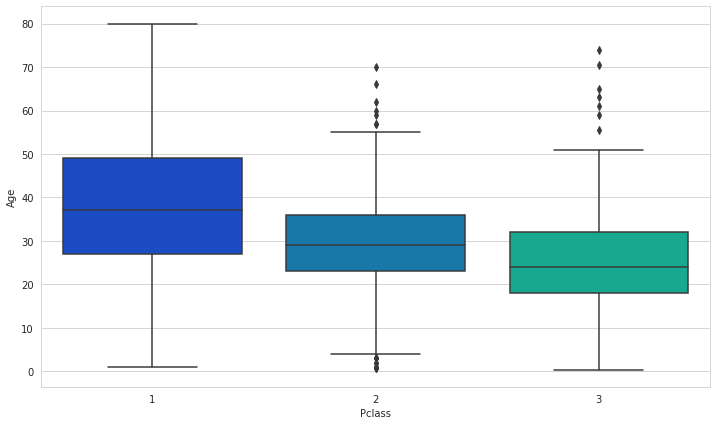

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [ ]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [ ]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

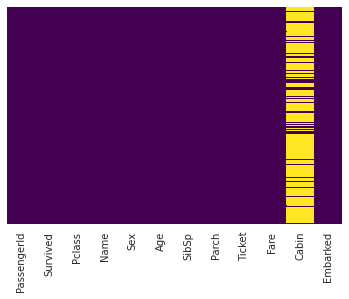

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df.drop('Cabin',axis=1,inplace=True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# DP


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
df = pd.concat([df,sex,embark],axis=1)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), df['Survived'], test_size=0.25,random_state=321)

#Feature Scaling


In [ ]:
scaler = MinMaxScaler().fit(X_train)
X_trainval_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training and Predicting

# **LR**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc, classification_report

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print(classification_report(y_test,predictions))
ccm = confusion_matrix(y_test,predictions) 
print ('Confusion Matrix :')
print(ccm) 

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       130
           1       0.84      0.70      0.76        93

    accuracy                           0.82       223
   macro avg       0.83      0.80      0.81       223
weighted avg       0.82      0.82      0.82       223

Confusion Matrix :
[[118  12]
 [ 28  65]]


# **NB**

In [30]:
#navie bayes
from sklearn.naive_bayes import GaussianNB
# Create a Gaussian Classifier
gnb = GaussianNB()

# Train the model using the training sets
gnb.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[108  22]
 [ 24  69]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       130
           1       0.76      0.74      0.75        93

    accuracy                           0.79       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.79      0.79      0.79       223



# **KNN**

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[99 31]
 [57 36]]
              precision    recall  f1-score   support

           0       0.63      0.76      0.69       130
           1       0.54      0.39      0.45        93

    accuracy                           0.61       223
   macro avg       0.59      0.57      0.57       223
weighted avg       0.59      0.61      0.59       223



Text(0, 0.5, 'Error Rate')

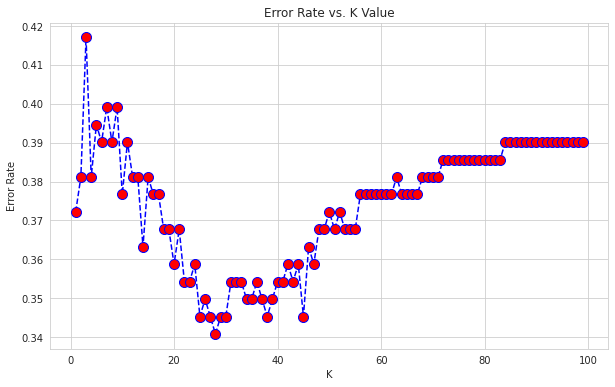

In [35]:
error_rate = []

# Will take some time
for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [38]:
knn = KNeighborsClassifier(n_neighbors=29)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=29')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=29


[[124   6]
 [ 71  22]]


              precision    recall  f1-score   support

           0       0.64      0.95      0.76       130
           1       0.79      0.24      0.36        93

    accuracy                           0.65       223
   macro avg       0.71      0.60      0.56       223
weighted avg       0.70      0.65      0.60       223



# **DT**

In [41]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
print(confusion_matrix(y_test,Y_pred))
print(classification_report(y_test,Y_pred))

[[98 32]
 [24 69]]
              precision    recall  f1-score   support

           0       0.80      0.75      0.78       130
           1       0.68      0.74      0.71        93

    accuracy                           0.75       223
   macro avg       0.74      0.75      0.74       223
weighted avg       0.75      0.75      0.75       223



# **SGD**

In [42]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
print(confusion_matrix(y_test,Y_pred))
print(classification_report(y_test,Y_pred))

[[  3 127]
 [  1  92]]
              precision    recall  f1-score   support

           0       0.75      0.02      0.04       130
           1       0.42      0.99      0.59        93

    accuracy                           0.43       223
   macro avg       0.59      0.51      0.32       223
weighted avg       0.61      0.43      0.27       223



# **RF**

In [43]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
print(confusion_matrix(y_test,Y_pred))
print(classification_report(y_test,Y_pred))

[[117  13]
 [ 16  77]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       130
           1       0.86      0.83      0.84        93

    accuracy                           0.87       223
   macro avg       0.87      0.86      0.87       223
weighted avg       0.87      0.87      0.87       223



# **SVM(L)**

In [44]:
from sklearn.svm import SVC, LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
print(confusion_matrix(y_test,Y_pred))
print(classification_report(y_test,Y_pred))

[[114  16]
 [ 31  62]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       130
           1       0.79      0.67      0.73        93

    accuracy                           0.79       223
   macro avg       0.79      0.77      0.78       223
weighted avg       0.79      0.79      0.79       223



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
